In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
from collections import Counter

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fraud-con-balanceo/kernel77fd79df23 (1).ipynb
/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
fraud_file='../input/creditcardfraud/creditcard.csv'
fraud=pd.read_csv(fraud_file)
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(fraud.groupby("Class").size())

Class
0    284315
1       492
dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

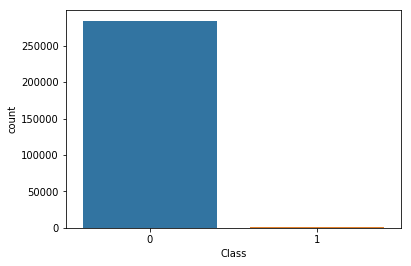

In [4]:
sns.countplot("Class", data=fraud)
plt.show

In [5]:
y=fraud.Class
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [6]:
X=fraud.drop(["Class"], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [32]:
train_X,test_X,train_y,test_y=train_test_split(X,y, train_size=0.7, random_state=1)

fraud_model=LogisticRegression()
fraud_model.fit(train_X,train_y)
test_predictions=fraud_model.predict(test_X)
print(test_predictions)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 0 ... 0 0 0]


In [33]:
print(confusion_matrix(test_predictions,test_y))

[[85278    55]
 [   30    80]]


In [34]:
print(classification_report(test_predictions,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85333
           1       0.59      0.73      0.65       110

    accuracy                           1.00     85443
   macro avg       0.80      0.86      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [38]:
# balanceo datos haciendo subsampling en la muestra mayoritaria

nr=NearMiss(ratio=0.5, n_neighbors=3, random_state=1)
train_X_miss,train_y_miss=nr.fit_sample(train_X,train_y)

#vemos nuestros datos antes y despues de balancear

print("antes{}".format(Counter(train_y)))
print("despues{}".format(Counter(train_y_miss)))



antesCounter({0: 199007, 1: 357})
despuesCounter({0: 714, 1: 357})


In [44]:
train_X_miss,test_X,train_y_miss,test_y=train_test_split(X,y, train_size=0.7, random_state=1)

new_model=LogisticRegression()
new_model.fit(train_X_miss,train_y_miss)
new_predictions=new_model.predict(test_X)



AttributeError: 'NearMiss' object has no attribute 'predict'

In [43]:
print(confusion_matrix(new_predictions,test_y))

#porque no hay cambios?


[[85278    55]
 [   30    80]]


In [31]:
print(classification_report(test1_predictions,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85333
           1       0.59      0.73      0.65       110

    accuracy                           1.00     85443
   macro avg       0.80      0.86      0.83     85443
weighted avg       1.00      1.00      1.00     85443

